In [11]:
import numpy as np
import sklearn 

In [221]:
data = []
hashData = {}
c = 0
with open("../../Cache/arrowStats.cfg",'r') as f:
    for line in f:
        eeee = line.split('=')
        n,d = eeee[0],eeee[1]
        k = n.find("(")
        p0,v0 = n[k:].split("_")
        chiave = p0.strip()+v0.strip()
        dataPoints=[]
        for p in d.split(";")[:-1]:
            p = p.strip()[1:-1].split(',')
            p1 = float(p[0])
            p2 = float(p[1])
            dataPoints.append((p1,p2))
        try:
            if n[0]=='P':#Positions
                hashData[chiave]=np.array(dataPoints),hashData[chiave][1]
            else:
                hashData[chiave]=hashData[chiave][0],np.array(dataPoints)
        except KeyError:
            if n[0]=='P':#Positions
                hashData[chiave]=np.array(dataPoints),[]
            else:
                hashData[chiave]=[],np.array(dataPoints)
        c+=1
        
len(hashData.keys()), "elements",c,"lines"

(96, 'elements', 192, 'lines')

In [222]:
#list(hashData.keys())[5],hashData[list(hashData.keys())[5]]

In [223]:
import matplotlib.pyplot as plt

(6.96139, -16.1753)(261.923, 526.3)
(6.29422, -12.5884)(495.064, 526.3)
(-3.03049, -5.02362)(403.556, 526.3)
(3.93898, -13.5349)(261.923, 526.3)
(4.25236, -13.426)(171.663, 526.465)
(-1.6417, -5.63796)(265.923, 526.3)
(5.1374, -2.82592)(600.302, 526.301)
(-2.22423, -17.4762)(265.923, 526.3)
(-5.94025, -12.7715)(538.077, 526.3)
(-2.80844, -13.7991)(284.56, 526.3)
(-2.38529, -17.456)(209.656, 526.3)
(16.7948, -5.25957)(261.923, 526.3)
(-3.5055, -13.6323)(538.077, 526.3)
(11.5425, -8.04937)(261.923, 526.3)
(-13.3595, -11.4808)(538.077, 526.3)
(0.329189, -17.613)(534.077, 526.3)
(-17.4659, -2.2683)(648.825, 526.3)
(-17.1558, -3.96689)(668.743, 526.3)
(14.0091, -1.35911)(516.213, 526.3)
(-17.5202, -1.80854)(648.825, 526.3)
(-7.67516, -11.8239)(499.064, 526.3)
(6.84235, -16.2367)(182.786, 526.3)
(-5.79189, -0.971202)(533.309, 526.3)
(-2.9541, -17.3666)(331.845, 526.3)
(6.23387, -16.4485)(331.67, 526.3)
(11.3043, -8.41704)(261.923, 526.3)
(4.39823, -17.0431)(205.656, 526.3)
(3.29224, -13.6899

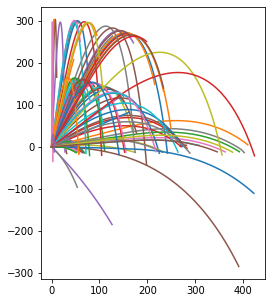

(3438, 96, 'shots')

In [270]:
c=0
good_shots = 0
BigX = []
BigY = []
for h in hashData.keys():
    c+=1
    
    if (len(hashData[h][0])==0):
        print(h,c,hashData[h])
        continue
    hashData[h] = (hashData[h][0]-hashData[h][0][0],hashData[h][1])
    X,Xv = hashData[h]
    #
    
    if  True:   
        plt.plot(np.abs(X[:,0]),-X[:,1],label="shot " +str(c))
        X[:,0] = np.abs(X[:,0])
        for i,e in enumerate(X[:-1]):
            inputX = np.hstack([e,Xv[i]])
            BigX.append(inputX)
            BigY.append(np.hstack([X[i+1],Xv[i+1]]))
        good_shots+=1
        print(h)
plt.show()
len(BigX),good_shots,"shots"

In [271]:
from sklearn.neural_network import MLPRegressor

In [272]:
clf = MLPRegressor(solver='adam', alpha=1e-4,hidden_layer_sizes=(128,12), random_state=1,max_iter = 500, activation='relu')

In [273]:
clf.fit(BigX,BigY)

MLPRegressor(hidden_layer_sizes=(128, 12), max_iter=500, random_state=1)

In [274]:
clf.loss_

0.038275981229552454

In [275]:
idx = 600
BigX[idx],BigY[idx],clf.predict([BigX[idx]])

(array([285.792  , -15.845  , -10.6381 ,   1.91046]),
 array([296.182  , -13.585  , -10.3899 ,   2.26029]),
 array([[296.01317012, -14.29086072, -10.17216119,   2.06721124]]))

In [276]:
plt.rcParams["figure.figsize"] = (4,5)

1
[  0.        0.        6.96139 -16.1753 ]


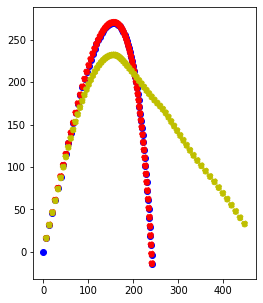

2
[  0.        0.        6.29422 -12.5884 ]


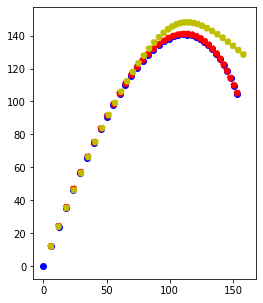

3
[ 0.       0.      -3.03049 -5.02362]


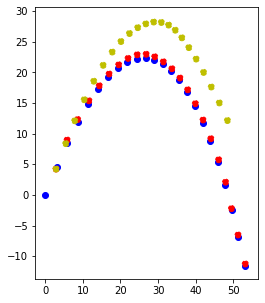

4
[  0.        0.        3.93898 -13.5349 ]


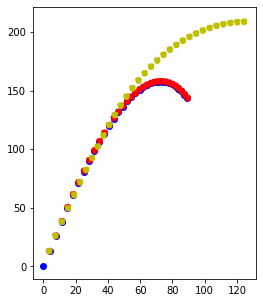

5
[  0.        0.        4.25236 -13.426  ]


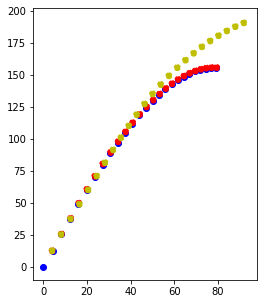

6
[ 0.       0.      -1.6417  -5.63796]


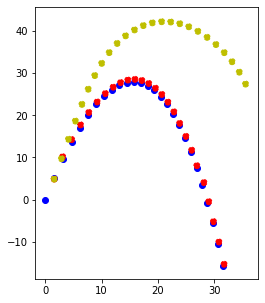

7
[ 0.       0.       5.1374  -2.82592]


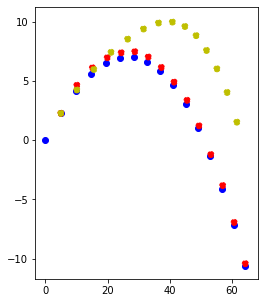

8
[  0.        0.       -2.22423 -17.4762 ]


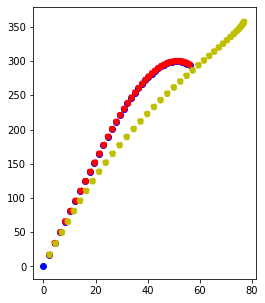

9
[  0.        0.       -5.94025 -12.7715 ]


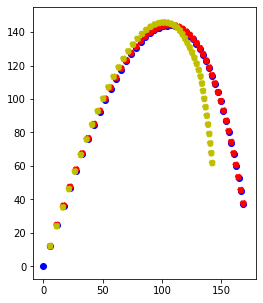

10
[  0.        0.       -2.80844 -13.7991 ]


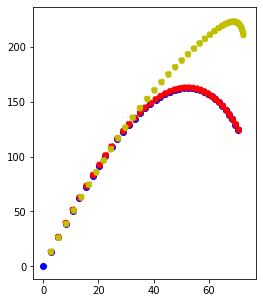

11
[  0.        0.       -2.38529 -17.456  ]


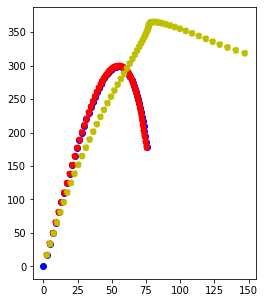

12
[ 0.       0.      16.7948  -5.25957]


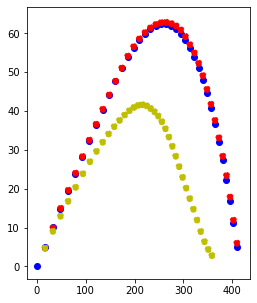

13
[  0.       0.      -3.5055 -13.6323]


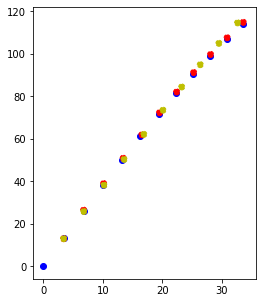

14
[ 0.       0.      11.5425  -8.04937]


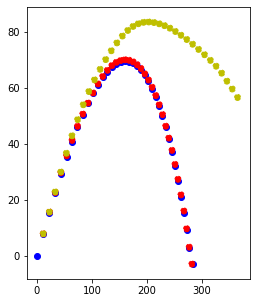

15
[  0.       0.     -13.3595 -11.4808]


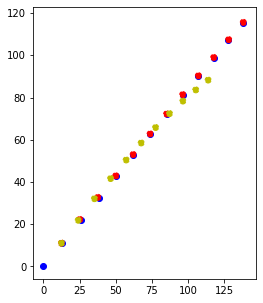

16
[  0.         0.         0.329189 -17.613   ]


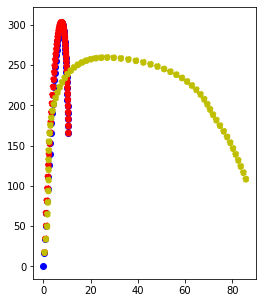

17
[  0.       0.     -17.4659  -2.2683]


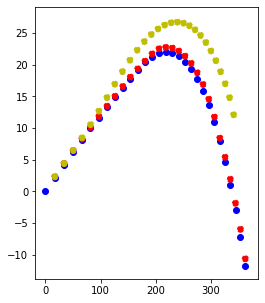

18
[  0.        0.      -17.1558   -3.96689]


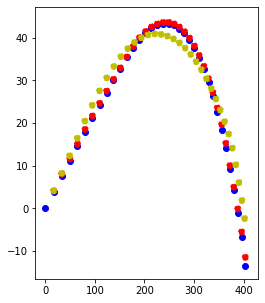

19
[ 0.       0.      14.0091  -1.35911]


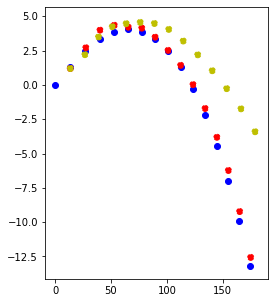

20
[  0.        0.      -17.5202   -1.80854]


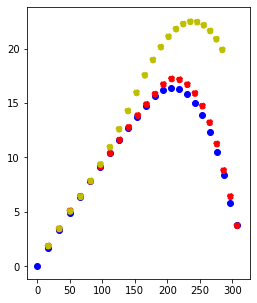

21
[  0.        0.       -7.67516 -11.8239 ]


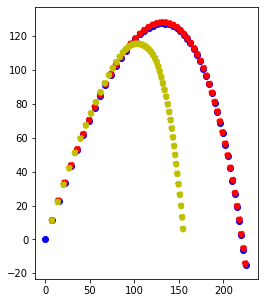

22
[  0.        0.        6.84235 -16.2367 ]


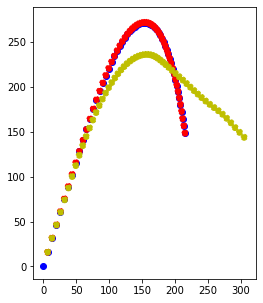

23
[ 0.        0.       -5.79189  -0.971202]


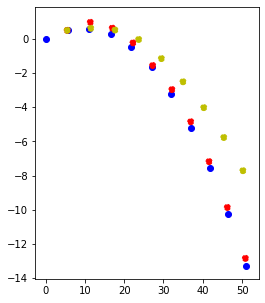

24
[  0.       0.      -2.9541 -17.3666]


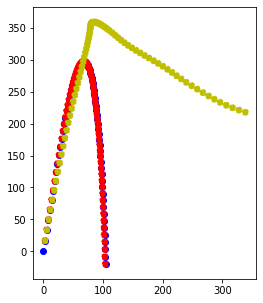

25
[  0.        0.        6.23387 -16.4485 ]


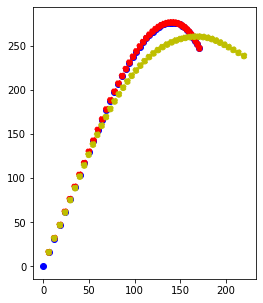

26
[ 0.       0.      11.3043  -8.41704]


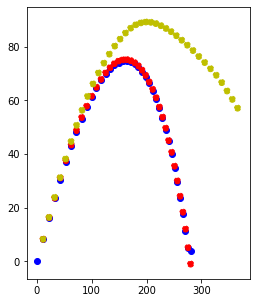

27
[  0.        0.        4.39823 -17.0431 ]


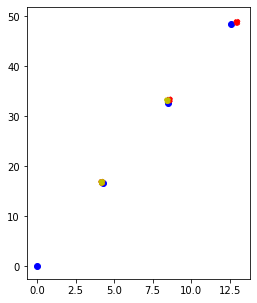

28
[  0.        0.        3.29224 -13.6899 ]


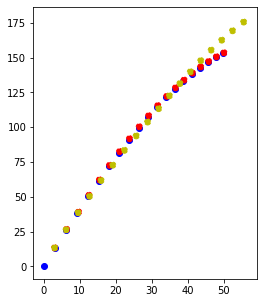

29
[  0.        0.        7.23491 -12.0888 ]


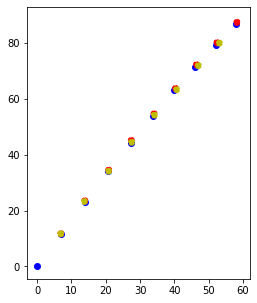

30
[  0.        0.        6.03275 -12.7359 ]


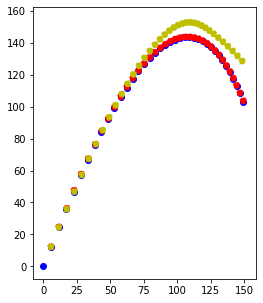

31
[ 0.       0.      15.5553  -8.22394]


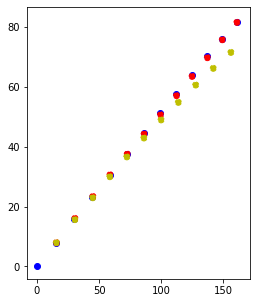

32
[  0.         0.         0.222762 -17.6147  ]


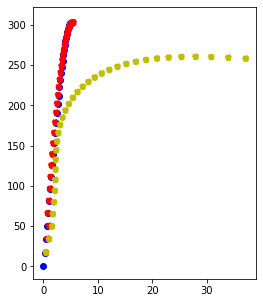

33
[  0.       0.       3.604  -13.6231]


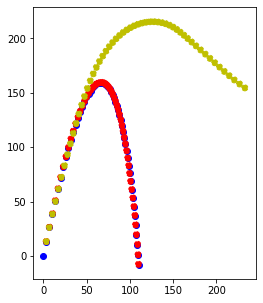

34
[ 0.      0.     12.4625 -6.547 ]


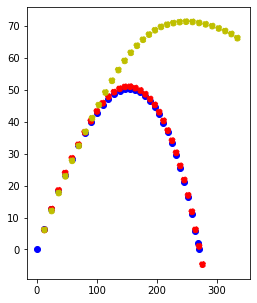

35
[  0.         0.        -0.793382 -17.5763  ]


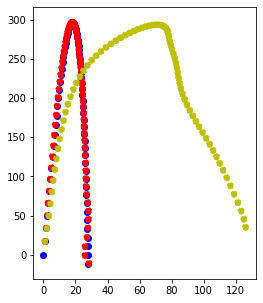

36
[  0.        0.        8.59209 -11.1555 ]


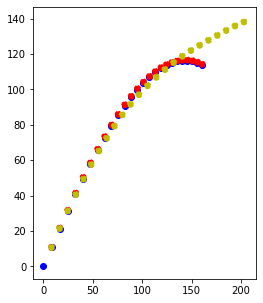

37
[ 0.        0.       -5.7919   -0.971126]


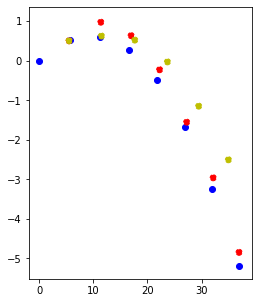

38
[ 0.       0.      -3.99513 -4.29986]


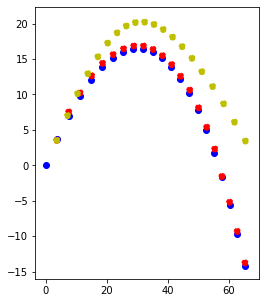

39
[  0.        0.      -17.3722   -2.91405]


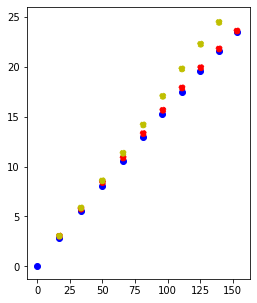

40
[  0.       0.      -3.7383 -13.5873]


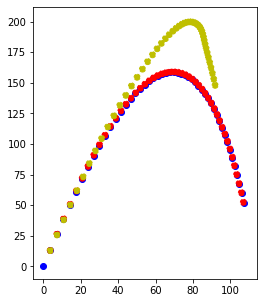

41
[  0.        0.        6.74398 -12.364  ]


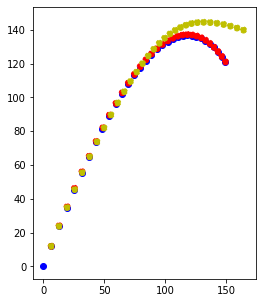

42
[  0.        0.        7.40338 -15.9871 ]


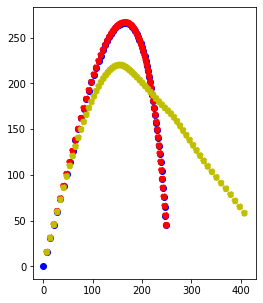

43
[ 0.       0.      17.3154  -3.26437]


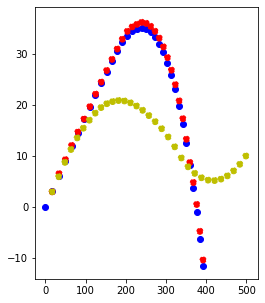

44
[  0.        0.       -5.00749 -13.1649 ]


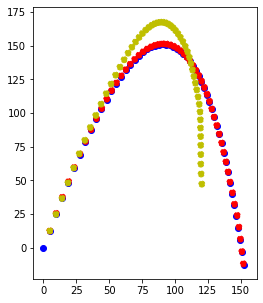

45
[ 0.       0.      -5.04838 -2.99163]


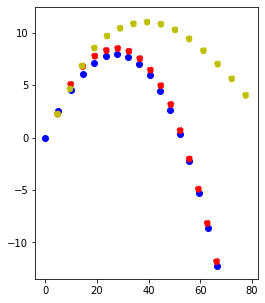

46
[  0.        0.        6.24537 -12.6132 ]


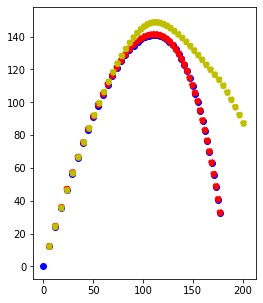

47
[  0.        0.       -2.06091 -17.4961 ]


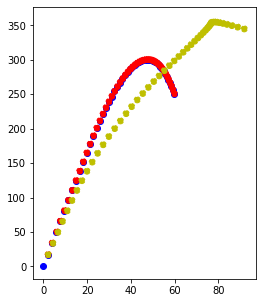

48
[  0.        0.        6.64241 -16.3042 ]


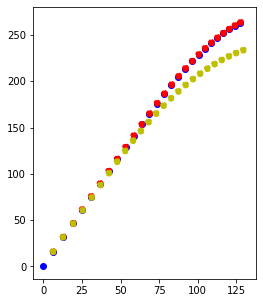

49
[  0.        0.      -13.655    -3.47582]


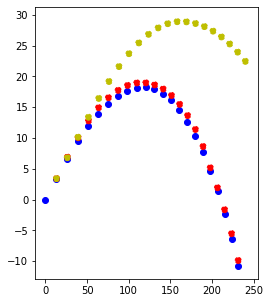

50
[  0.        0.       -3.07788 -13.7321 ]


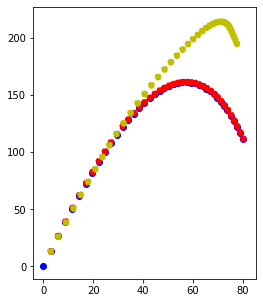

51
[ 0.       0.       4.48602 -3.79023]


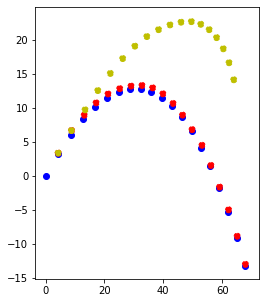

52
[  0.        0.        7.36785 -16.006  ]


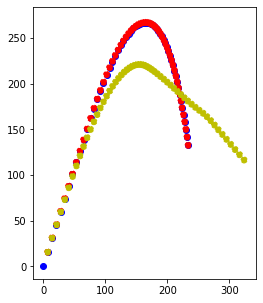

53
[ 0.       0.       4.52257 -3.73896]


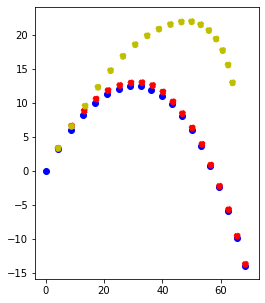

54
[  0.        0.       -7.08453 -16.1067 ]


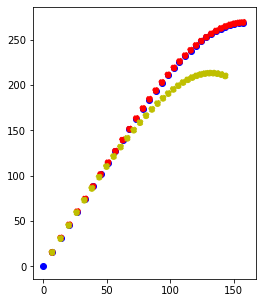

55
[ 0.       0.      -9.11884 10.7326 ]


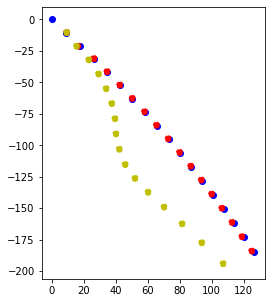

56
[ 0.        0.       14.0909    0.218245]


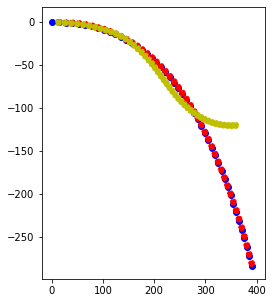

57
[  0.        0.       -5.09733 -13.1383 ]


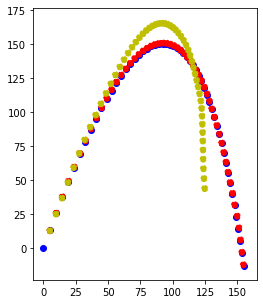

58
[  0.        0.       -4.96516 -16.9026 ]


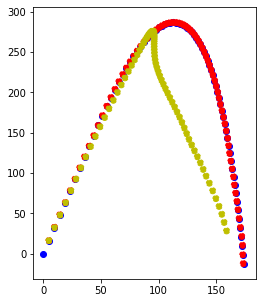

59
[  0.        0.       -5.04651 -16.8818 ]


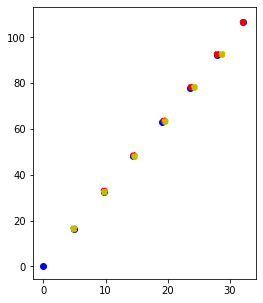

60
[  0.        0.       -2.03889 -17.4761 ]


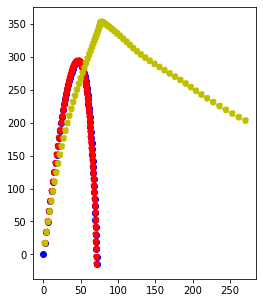

61
[  0.        0.      -10.5152   -9.38547]


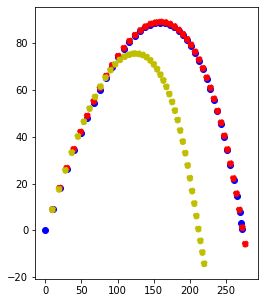

62
[ 0.        0.        0.300786 -5.85606 ]


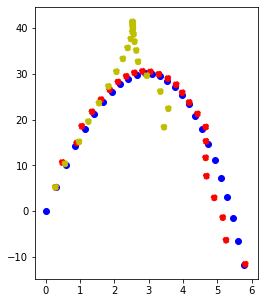

63
[  0.       0.       2.5419 -13.8574]


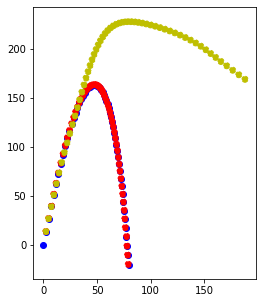

64
[  0.        0.       -3.52502 -13.6431 ]


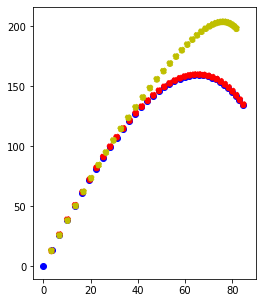

65
[ 0.       0.       5.32673 -2.47095]


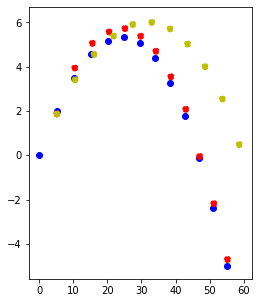

66
[  0.        0.       -5.60454 -16.7031 ]


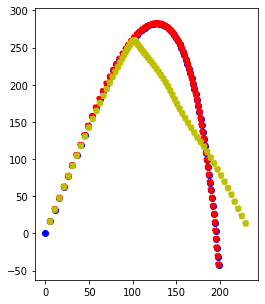

67
[  0.          0.          0.0761255 -17.6026   ]


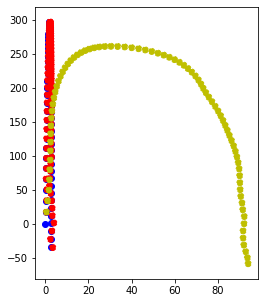

68
[ 0.       0.      -4.29874  4.00188]


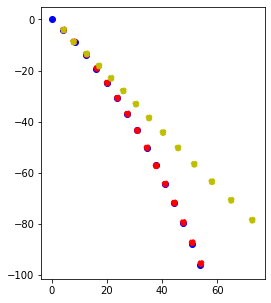

69
[  0.       0.      10.5705 -14.0625]


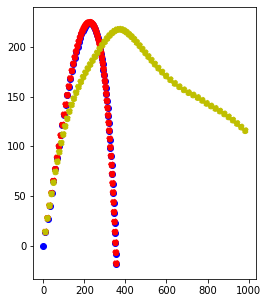

70
[  0.        0.        4.56928 -13.3107 ]


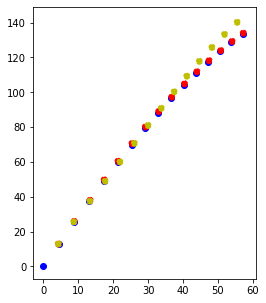

71
[  0.        0.       -3.84226 -13.5439 ]


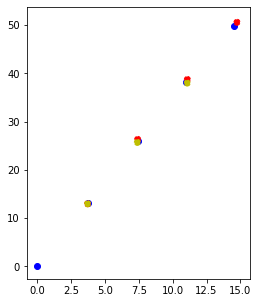

72
[  0.       0.       3.4066 -17.2662]


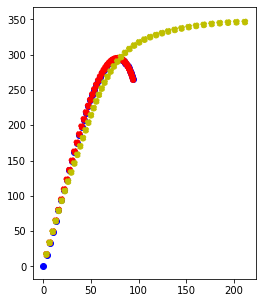

73
[  0.        0.        2.57503 -13.8344 ]


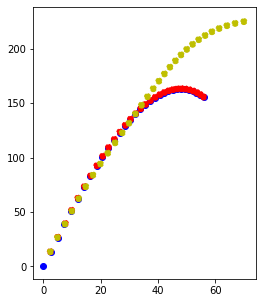

74
[ 0.       0.      -5.3741  -2.36078]


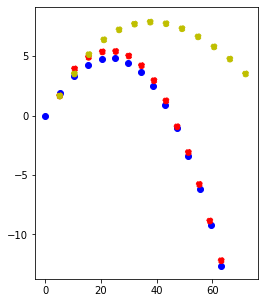

75
[ 0.       0.       3.29129 -4.86239]


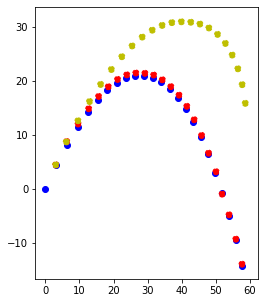

76
[  0.        0.        6.38569 -16.4102 ]


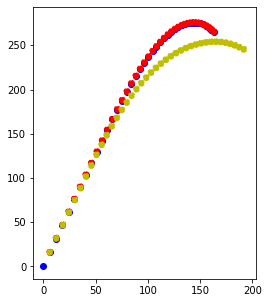

77
[ 0.       0.      -5.63673 -1.6455 ]


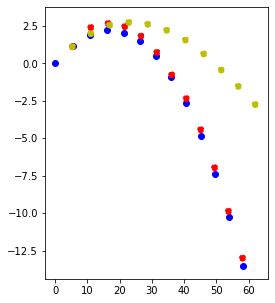

78
[ 0.       0.      13.6798  -3.36269]


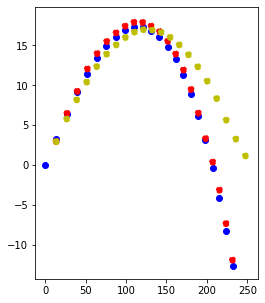

79
[  0.       0.      -3.2688 -17.3006]


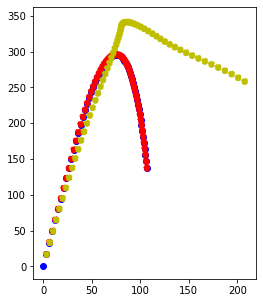

80
[  0.        0.        9.51864 -10.3855 ]


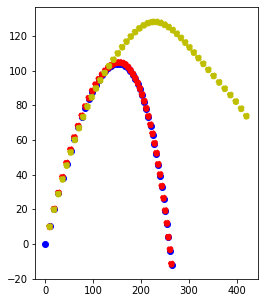

81
[ 0.        0.       17.6177    0.266802]


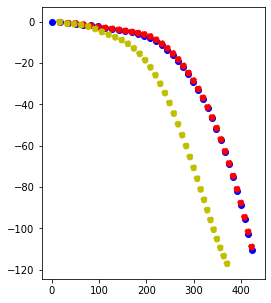

82
[  0.       0.       1.8132 -13.9606]


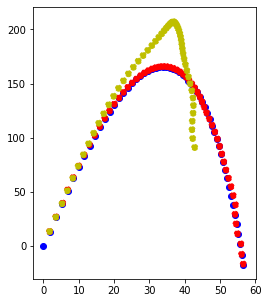

83
[  0.        0.       -1.45841 -17.5342 ]


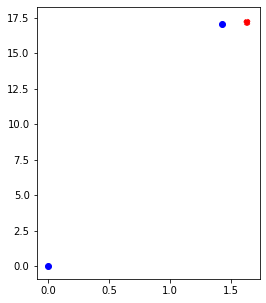

84
[  0.       0.      13.1652 -11.712 ]


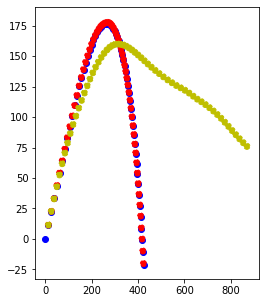

85
[  0.        0.       -4.96513 -16.9027 ]


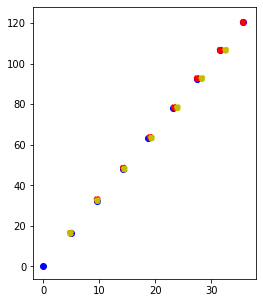

86
[  0.        0.       -7.42532 -15.9644 ]


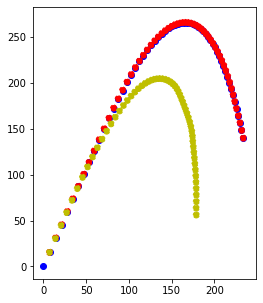

87
[  0.       0.      -7.4361 -11.9624]


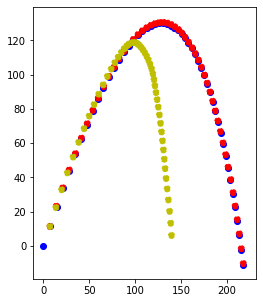

88
[ 0.       0.      12.0465  -7.30353]


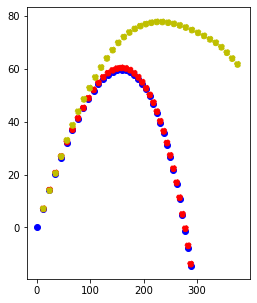

89
[  0.       0.     -17.4033  -2.7122]


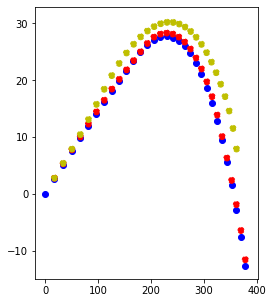

90
[  0.        0.        7.59198 -11.8625 ]


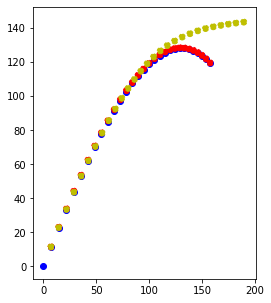

91
[  0.        0.       -4.58951 -13.3096 ]


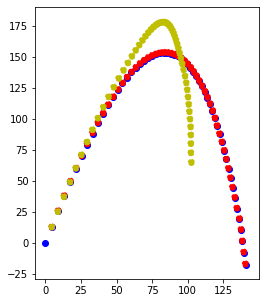

92
[  0.       0.       3.6973 -17.2156]


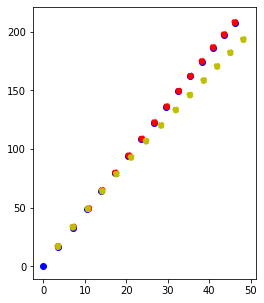

93
[ 0.        0.       -5.79187  -0.971314]


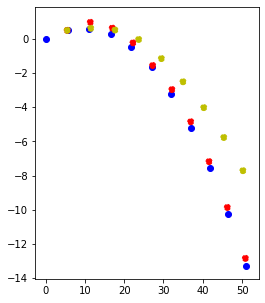

94
[  0.        0.       -7.74614 -15.8219 ]


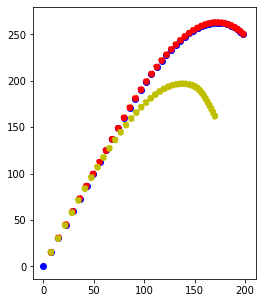

95
[ 0.        0.        0.301444 -5.85602 ]


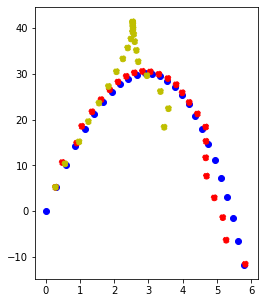

96
[  0.        0.      -17.5202   -1.80856]


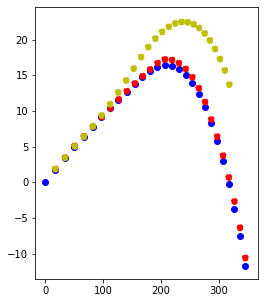

In [281]:

c=0
for h in hashData.keys():
    c+=1
    #hashData[h] = (hashData[h][0]-hashData[h][0][0],hashData[h][1])
    X,Xv = hashData[h]
    #print(hashData[h])
    print(c)

    plt.scatter(X[:,0],-X[:,1],c='b',label=("Original shot " if c==0 else ''))

    inputBigX = []
    curr_preds = []
    curr_preds.append( np.hstack([X[0,:],Xv[0,:]]))
    inputBigX.append(np.hstack([X[0,:],Xv[0,:]]))
    for i,e in enumerate(X[1:-1]):
        
        inputBigX.append(np.hstack([e,Xv[i]]))
        curr_preds.append( clf.predict([curr_preds[-1]])[0])
    print(curr_preds[0])
    curr_preds = np.array(curr_preds)
    predX = clf.predict(inputBigX)
    plt.scatter(predX[:,0],-predX[:,1],c='r',linestyle='--',lw=1,label=("Predicted shot pointwise" if c==0 else ''))
    plt.scatter(curr_preds[1:,0],-curr_preds[1:,1],c='y',linestyle='--',lw=1,label=("Predicted with precedent prediction" if c==0 else ''))
    if c==0:
        plt.legend(fontsize=22)
    plt.show()

currentpred :  [[  6.33800743 -15.51193206   6.20301716 -15.81877918]]
currentpred :  [[ 11.92549818 -30.66789724   5.45109918 -15.46837138]]
currentpred :  [[ 16.76881005 -45.47413008   4.70550985 -15.12417673]]
currentpred :  [[ 20.87415487 -59.9369612    3.96612273 -14.78629304]]
currentpred :  [[ 24.24761812 -74.06281507   3.23281094 -14.4548159 ]]
currentpred :  [[ 26.89515841 -87.85820779   2.50544708 -14.12983881]]
currentpred :  [[  28.82260684 -101.32974507    1.78390306  -13.81145322]]
currentpred :  [[  30.03566624 -114.48412017    1.06804999  -13.49974869]]
currentpred :  [[  30.53991026 -127.32811204    0.35775803  -13.19481295]]
currentpred :  [[  30.34078233 -139.86858352   -0.34710368  -12.89673196]]
currentpred :  [[  29.4435946  -152.11247963   -1.04666717  -12.60559008]]
currentpred :  [[  27.85352662 -164.06682593   -1.74106576  -12.32147007]]
currentpred :  [[  25.57562403 -175.738727     -2.43043411  -12.04445323]]
currentpred :  [[  22.61479713 -187.13536499   -3

NameError: name 'validationSet' is not defined

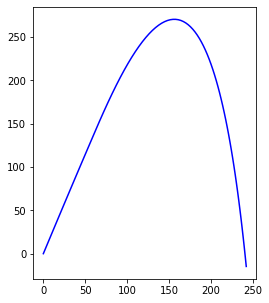

In [232]:
c=0
for h in hashData.keys():
    c+=1
    if c in [15, 30, 31,32]:
        continue        
    hashData[h] = (hashData[h][0]-hashData[h][0][0],hashData[h][1])
    positions,velocities = hashData[h]

    plt.plot(positions[:,0],-positions[:,1],c='b',label=("Original shot " if c==4 else ''))
    
    inputBigX = []
    posX =[]
    posY =[]
    currentPred = []
    for i in range(50):
        if(i == 0):
            currentPred = clf.predict([np.hstack([positions[0],velocities[0]])])
            posX.append(currentPred[0][0])
            posY.append(-currentPred[0][1])
        else:
            currentPred = clf.predict(currentPred)
            posX.append(currentPred[0][0])
            posY.append(-currentPred[0][1])
        print("currentpred : ", currentPred)
    #for i,position in enumerate(positions[:-1]):
    #    inputBigX.append(np.hstack([position,velocities[i]]))
        
        
    #predX = clf.predict(inputBigX)
    #print(posX,posY)
    if c in validationSet:
        plt.plot(posX,posY,c='y',linestyle='--',lw=3,label=("Predicted shot " if c==4 else ''))
    else:
        plt.plot(posX,posY,c='r',linestyle='--',lw=3,label=("Predicted shot " if c==4 else ''))
plt.legend(fontsize=22)
plt.show()